<p><font size="6"><b>Xarray advanced</b></font></p>


> *DS Python for GIS and Geoscience*  
> *October, 2021*
>
> *© 2021, Joris Van den Bossche and Stijn Van Hoey. Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=overview

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Meet `xarray.Dataset`

We already know `xarray.DataArray`, it is a single multi-dimensional array and each dimension can have a name and coordinate values. Next to the `DataArray`, `xarray` has a second main data structure to store arrays, i.e. `xarray.DataSet`. 

Let's read an xarray data set (global rain/temperature coverage stored in the file `2016-2017_global_rain-temperature.nc`), using the function `open_dataset`:

In [9]:
ds = xr.open_dataset("./data/2016-2017_global_rain-temperature.nc")
ds

<xarray.Dataset>
Dimensions:        (y: 347, x: 720, year: 2)
Coordinates:
  * y              (y) float64 83.25 82.75 82.25 81.75 ... -88.75 -89.25 -89.75
  * x              (x) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * year           (year) int64 2016 2017
Data variables:
    precipitation  (year, y, x) float32 ...
    temperature    (year, y, x) float32 ...

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

xarray provides reading function for different formats. For GIS formats such as geotiff and other GDAL readable raster data, 
the `open_rasterio` function is available. NetCDF-alike data formats can be loaded using the by `open_dataset` function.

</div>

Let's take a closer look at this `xarray.Dataset`:

- A `xarray.Dataset` is the second main data type provided by xarray
- This example has 3 __dimensions__:
    - `y`: the y coordinates of the data set
    - `x`: the x coordinates of the data set
    - `year`: the year coordinate of the data set
- Each of these dimensions are defined by a __coordinate__ (1D) array
- It has 2 __Data variables__: `precipitation` and `temperature` that both share the same coordinates

Hence, a `Dataset` object stores *multiple* arrays that have shared dimensions (__Note:__ not all dimensions need to be shared).  It is designed as an in-memory representation of the data model from the netCDF file format.

![](http://xarray.pydata.org/en/stable/_images/dataset-diagram.png)

In [10]:
ds["temperature"].shape, ds["temperature"].dims

((2, 347, 720), ('year', 'y', 'x'))

The data and coordinate variables are also contained separately in the `data_vars` and `coords` dictionary-like attributes of a `xarray.DataSet` to access them directly:

- The data variables:

In [11]:
ds.data_vars

Data variables:
    precipitation  (year, y, x) float32 ...
    temperature    (year, y, x) float32 ...

- The data coordinates:

In [12]:
ds.coords

Coordinates:
  * y        (y) float64 83.25 82.75 82.25 81.75 ... -88.25 -88.75 -89.25 -89.75
  * x        (x) float64 -179.8 -179.2 -178.8 -178.2 ... 178.2 178.8 179.2 179.8
  * year     (year) int64 2016 2017

If you rather use an alternative name for a given variable, use the `rename` method:

In [13]:
ds.rename({"precipitation": "rain"})

<xarray.Dataset>
Dimensions:      (y: 347, x: 720, year: 2)
Coordinates:
  * y            (y) float64 83.25 82.75 82.25 81.75 ... -88.75 -89.25 -89.75
  * x            (x) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * year         (year) int64 2016 2017
Data variables:
    rain         (year, y, x) float32 ...
    temperature  (year, y, x) float32 ...

Adding new variables to the data set is very similar to Pandas/GeoPandas:

In [14]:
ds["precipitation_m"] = ds["precipitation"]/1000.

In [15]:
ds

<xarray.Dataset>
Dimensions:          (y: 347, x: 720, year: 2)
Coordinates:
  * y                (y) float64 83.25 82.75 82.25 ... -88.75 -89.25 -89.75
  * x                (x) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * year             (year) int64 2016 2017
Data variables:
    precipitation    (year, y, x) float32 nan nan nan nan ... 0.8 0.8 0.8 0.8
    temperature      (year, y, x) float32 ...
    precipitation_m  (year, y, x) float32 nan nan nan ... 0.0008 0.0008 0.0008

### Selecting `DataSet` data

Each of the data variables can be accessed as a single `xarray.DataArray` similar to selecting dictionaries or DataFrames:

In [16]:
type(ds["precipitation"]), type(ds["temperature"])

(xarray.core.dataarray.DataArray, xarray.core.dataarray.DataArray)

One can select multiple variables at the same time as well by passing a list of variable names:

In [17]:
ds[["temperature", "precipitation"]]

<xarray.Dataset>
Dimensions:        (year: 2, y: 347, x: 720)
Coordinates:
  * y              (y) float64 83.25 82.75 82.25 81.75 ... -88.75 -89.25 -89.75
  * x              (x) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * year           (year) int64 2016 2017
Data variables:
    temperature    (year, y, x) float32 ...
    precipitation  (year, y, x) float32 nan nan nan nan nan ... 0.8 0.8 0.8 0.8

Or the other way around, use the `drop_vars` to drop variables from the data set:

In [18]:
ds.drop_vars("temperature")

<xarray.Dataset>
Dimensions:          (y: 347, x: 720, year: 2)
Coordinates:
  * y                (y) float64 83.25 82.75 82.25 ... -88.75 -89.25 -89.75
  * x                (x) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * year             (year) int64 2016 2017
Data variables:
    precipitation    (year, y, x) float32 nan nan nan nan ... 0.8 0.8 0.8 0.8
    precipitation_m  (year, y, x) float32 nan nan nan ... 0.0008 0.0008 0.0008

<div class="alert alert-info" style="font-size:120%">

**NOTE**: <br>

Selecting a single variable using `[]` results into a `xarray.DataArray`, selecting multiple variables using a list `[[..., ...]]` results into a `xarray.DataSet`. Using `drop_vars` always returns a `xarray.DataSet`.

</div>

The selection with `sel` works as well with `xarray.DataSet`, selecting the data _for all variables in the DataSet_ and returning a DataSet:

In [19]:
ds.sel(year=2016)

<xarray.Dataset>
Dimensions:          (y: 347, x: 720)
Coordinates:
  * y                (y) float64 83.25 82.75 82.25 ... -88.75 -89.25 -89.75
  * x                (x) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
    year             int64 2016
Data variables:
    precipitation    (y, x) float32 nan nan nan nan nan ... 0.2 0.2 0.2 0.2 0.2
    temperature      (y, x) float32 ...
    precipitation_m  (y, x) float32 nan nan nan nan ... 0.0002 0.0002 0.0002

The inverse of the `sel` method is the `drop_sel` which returns a DataSet with the enlisted indices removed:

In [20]:
ds.drop_sel(year=[2016])

<xarray.Dataset>
Dimensions:          (y: 347, x: 720, year: 1)
Coordinates:
  * y                (y) float64 83.25 82.75 82.25 ... -88.75 -89.25 -89.75
  * x                (x) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * year             (year) int64 2017
Data variables:
    precipitation    (year, y, x) float32 nan nan nan nan ... 0.8 0.8 0.8 0.8
    temperature      (year, y, x) float32 ...
    precipitation_m  (year, y, x) float32 nan nan nan ... 0.0008 0.0008 0.0008

### DataSet plotting

Plotting for data set level is rather limited. A typical use case that is supported to compare two data variables are scatter plots:

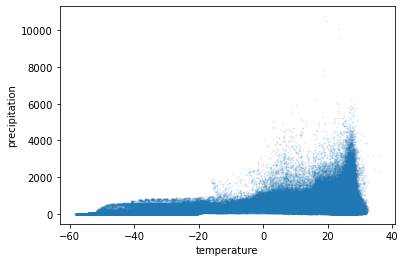

In [21]:
ds.plot.scatter("temperature", "precipitation", s=1, alpha=0.1)

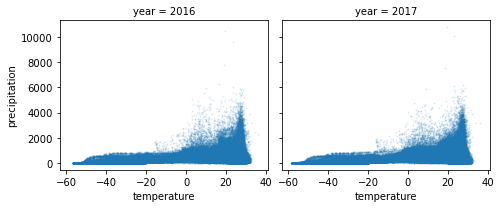

In [22]:
ds.plot.scatter("temperature", "precipitation", s=1, alpha=0.1, col="year")  # try also hue instead of col; requires hue_style="discrete"

### DataSet reductions

Datasets support arithmetic operations by automatically looping over all data variables and supports most of the same methods found on `xarray.DataArray`:

In [23]:
ds.mean()

<xarray.Dataset>
Dimensions:          ()
Data variables:
    precipitation    float32 536.7
    temperature      float32 -4.093
    precipitation_m  float32 0.5367

In [24]:
ds.max(dim=["x", "y"])

<xarray.Dataset>
Dimensions:          (year: 2)
Coordinates:
  * year             (year) int64 2016 2017
Data variables:
    precipitation    (year) float32 1.048e+04 1.077e+04
    temperature      (year) float32 36.1 35.8
    precipitation_m  (year) float32 10.48 10.77

__Note__ Using the names of the data variables (which is actually element-wise opertaions with DataArrays) makes a calculation very self-describing, e.g.

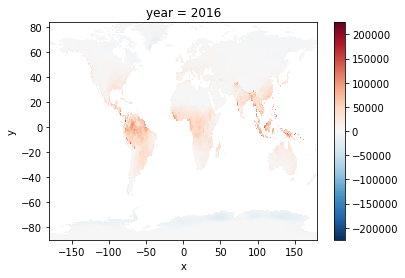

In [25]:
(ds["temperature"] * ds["precipitation"]).sel(year=2016).plot.imshow()

### Let's practice

For the next set of exercises, we introduce the [ERA5-Land monthly averaged data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land-monthly-means?tab=overview). 

> ERA5-Land is a reanalysis dataset providing a consistent view of the evolution of land variables over several decades. Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using the laws of physics. 

For this course, a subset of the data set focusing on Belgium has been prepared, containing the following variables:

- `sf`: Snowfall (_m of water equivalent_)
- `sp`: Surface pressure (_Pa_)
- `t2m`: 2 metre temperature (_K_)
- `tp`: Total precipitation (_m_)
- `u10`: 10 metre U wind component (_m/s_)

The dimensions are the `longitud`, `latitude` and `time`, which are each represented by a corresponding coordinate.

In [34]:
era5 = xr.open_dataset("./data/era5-land-monthly-means_example.nc")
era5

<xarray.Dataset>
Dimensions:    (time: 486, latitude: 21, longitude: 38)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-06-01
  * latitude   (latitude) float64 51.5 51.4 51.3 51.2 ... 49.8 49.7 49.6 49.5
  * longitude  (longitude) float64 2.5 2.6 2.7 2.8 2.9 ... 5.8 5.9 6.0 6.1 6.2
Data variables:
    u10        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    sf         (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-09-27T16:23 GRIB to CDM+CF via cfgrib-0.9.9...

<div class="alert alert-success">

**EXERCISE**:

The [short names used by ECMWF](https://confluence.ecmwf.int/display/CKB/ERA5-Land%3A+data+documentation) are not very convenient to understand. Rename the variables of the  data set according to the following mapping:
    
- `sf`: snowfall_m
- `sp`: pressure_pa
- `t2m`: temperature_k
- `tp`: precipitation_m
- `u10`: wind_ms   
    
Save the result of the mapping as the variable `era5_renamed`.

<details><summary>Hints</summary>

* Both `rename` and `rename_vars` can be used to rename the DataSet variables
* The `rename` function requires a `dict-like` input with the current names as the keys and the new names as the values. 

</details>    
    
</div>

In [38]:
mapping = {
    "sf": "snowfall_m",
    "sp": "pressure_pa",
    "t2m": "temperature_k",
    "tp": "precipitation_m",
    "u10": "wind_ms"
}

era5_renamed = era5.rename(mapping)
era5_renamed

<xarray.Dataset>
Dimensions:          (time: 486, latitude: 21, longitude: 38)
Coordinates:
  * time             (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-06-01
  * latitude         (latitude) float64 51.5 51.4 51.3 51.2 ... 49.7 49.6 49.5
  * longitude        (longitude) float64 2.5 2.6 2.7 2.8 2.9 ... 5.9 6.0 6.1 6.2
Data variables:
    wind_ms          (time, latitude, longitude) float32 ...
    temperature_k    (time, latitude, longitude) float32 ...
    pressure_pa      (time, latitude, longitude) float32 ...
    snowfall_m       (time, latitude, longitude) float32 ...
    precipitation_m  (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-09-27T16:23 GRIB to CDM+CF via cfgrib-0.9.9...

__Note:__ Make sure you have the variable `era5_renamed` correctly loaded for the following exercises. If not, load the solution of the previous exercise.

<div class="alert alert-success">

**EXERCISE**:

Start from the `era5_renamed` variable. You are used to work with temperatures defined in degrees celsius instead of Kelvin. Add a new data variable to `era5_renamed`, named `temperature_c`, by converting the `temperature_k` into degrees celsius:
    
$T_{^{\circ}C} = T_{K} - 273.15$
    
Create a histogram of the `temperature_c` to check the distribution of all the temperature valus in the data set. Use an appropriate number of bins to draw the histogram.

<details><summary>Hints</summary>

* Xarray - similar to Numpy - applies the mathematical operation element-wise, so no need for loops.
* Most plot functions work on `DataArray`, so make sure to select the variable to apply the `.plot.hist()`.
* One can define the number of bins using the `bins` parameter.

</details>    
    
</div>

In [45]:
era5_renamed["temperature_c"] = era5_renamed["temperature_k"] - 273.15

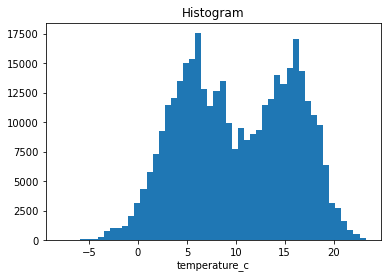

In [46]:
era5_renamed["temperature_c"].plot.hist(bins=50);

In [55]:
import cmocean

<div class="alert alert-success">

**EXERCISE**:

TODO

<details><summary>Hints</summary>

* 

</details>    
    
</div>

In [ ]:
import cmocean
ds["rain"].sel(year=2016).plot(cmap=cmocean.cm.rain, vmax=2000, figsize=(20, 10))

<div class="alert alert-success">

**EXERCISE**:

TODO

<details><summary>Hints</summary>

* 

</details>    
    
</div>

------- TODO ------

## Working with time series

In [98]:
era5 = xr.open_dataset("./data/era5-land-monthly-means.nc")
mapping = {
    "sf": "snowfall_m",
    "sp": "pressure_pa",
    "t2m": "temperature_k",
    "tp": "precipitation_m",
    "u10": "wind_ms"
}

era5_renamed = era5.rename(mapping)
era5_renamed

<xarray.Dataset>
Dimensions:          (time: 486, latitude: 21, longitude: 38)
Coordinates:
    number           int64 ...
  * time             (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-06-01
    step             timedelta64[ns] ...
    surface          float64 ...
  * latitude         (latitude) float64 51.5 51.4 51.3 51.2 ... 49.7 49.6 49.5
  * longitude        (longitude) float64 2.5 2.6 2.7 2.8 2.9 ... 5.9 6.0 6.1 6.2
    valid_time       (time) datetime64[ns] ...
Data variables:
    wind_ms          (time, latitude, longitude) float32 ...
    temperature_k    (time, latitude, longitude) float32 ...
    pressure_pa      (time, latitude, longitude) float32 ...
    snowfall_m       (time, latitude, longitude) float32 ...
    precipitation_m  (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-09-27T16:23 GRIB to CDM+CF via cfgrib-0.9.9...

### groupby

If we are interested in the _average over time_ for each of the levels, we can use a reducton function to get the averages of each of the variables at the same time:

In [99]:
era5_renamed.mean(dim=["time"])

<xarray.Dataset>
Dimensions:          (latitude: 21, longitude: 38)
Coordinates:
    number           int64 0
    step             timedelta64[ns] 1 days
    surface          float64 0.0
  * latitude         (latitude) float64 51.5 51.4 51.3 51.2 ... 49.7 49.6 49.5
  * longitude        (longitude) float64 2.5 2.6 2.7 2.8 2.9 ... 5.9 6.0 6.1 6.2
Data variables:
    wind_ms          (latitude, longitude) float32 nan nan nan ... 0.677 0.6613
    temperature_k    (latitude, longitude) float32 nan nan nan ... 282.7 282.9
    pressure_pa      (latitude, longitude) float32 nan nan ... 9.874e+04
    snowfall_m       (latitude, longitude) float32 nan nan ... 0.0001283
    precipitation_m  (latitude, longitude) float32 nan nan ... 0.002439 0.002376

But if we wanted the _average for each month of the year_ per level, we would first have to __split__ the data set in a group for each month of the year, __apply__ the average function on each of the months and __combine__ the data again. 

We already learned about the [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) approach when using Pandas. The syntax of Xarray’s groupby is almost identical to Pandas!

First, extract the month of the year (1-> 12) from each of the date coordinates:

In [100]:
era5_renamed["time"].dt.month  # The coordinates is a Pandas datetime index

<xarray.DataArray 'month' (time: 486)>
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6])
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-06-01
    step        timedelta64[ns] 1 days
    surface     float64 0.0
    valid_time  (time) datetime64[ns] 1981-01-02 1981-02-02 ... 2021-06-02

We can use these arrays in a groupby operation:

In [101]:
era5_renamed.groupby(era["time"].dt.month)

DatasetGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

Xarray also offers a more concise syntax when the variable you're grouping on is already present in the dataset. This is identical to the previous line:

In [102]:
era5_renamed.groupby("time.month")

DatasetGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

Next, we apply an aggregation function _for each of the months_ over the `date` dimension in order to end up with: _for each month of the year, the average (over time) for each of the levels_:

In [103]:
era5_renamed.groupby("time.month").mean(dim="time")

<xarray.Dataset>
Dimensions:          (latitude: 21, longitude: 38, month: 12)
Coordinates:
    number           int64 0
    step             timedelta64[ns] 1 days
    surface          float64 0.0
  * latitude         (latitude) float64 51.5 51.4 51.3 51.2 ... 49.7 49.6 49.5
  * longitude        (longitude) float64 2.5 2.6 2.7 2.8 2.9 ... 5.9 6.0 6.1 6.2
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    wind_ms          (month, latitude, longitude) float32 nan nan ... 0.9864
    temperature_k    (month, latitude, longitude) float32 nan nan ... 275.9
    pressure_pa      (month, latitude, longitude) float32 nan nan ... 9.88e+04
    snowfall_m       (month, latitude, longitude) float32 nan nan ... 0.0004173
    precipitation_m  (month, latitude, longitude) float32 nan nan ... 0.0029

### resample/rolling

Another (alike) operation - specifically for time series data - is to `resample` the data to another time-aggregation. For example, resample to monthly (`1M`) or yearly (`1Y`) median values:

In [104]:
era5_renamed.resample(time="Y").median()  # 1Y

<xarray.Dataset>
Dimensions:          (time: 41, latitude: 21, longitude: 38)
Coordinates:
  * time             (time) datetime64[ns] 1981-12-31 1982-12-31 ... 2021-12-31
    number           int64 0
    step             timedelta64[ns] 1 days
    surface          float64 0.0
  * latitude         (latitude) float64 51.5 51.4 51.3 51.2 ... 49.7 49.6 49.5
  * longitude        (longitude) float64 2.5 2.6 2.7 2.8 2.9 ... 5.9 6.0 6.1 6.2
Data variables:
    wind_ms          (time, latitude, longitude) float32 nan nan ... 0.5049
    temperature_k    (time, latitude, longitude) float32 nan nan ... 279.0 279.2
    pressure_pa      (time, latitude, longitude) float32 nan nan ... 9.882e+04
    snowfall_m       (time, latitude, longitude) float32 nan nan ... 6.312e-05
    precipitation_m  (time, latitude, longitude) float32 nan nan ... 0.002751

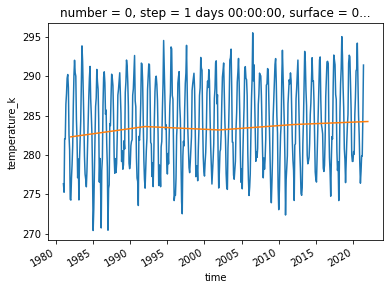

In [120]:
era5_renamed["temperature_k"].sel(latitude=51., longitude=4., method="nearest").plot.line(x="time");
era5_renamed["temperature_k"].sel(latitude=51., longitude=4., method="nearest").resample(time="10Y").median().plot.line(x="time");

A similar, but different functionality is `rolling` to calculate rolling window aggregates:

In [128]:
era5_renamed.rolling(time=12, center=True).median()

<xarray.Dataset>
Dimensions:          (time: 486, latitude: 21, longitude: 38)
Coordinates:
    number           int64 0
  * time             (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2021-06-01
    step             timedelta64[ns] 1 days
    surface          float64 0.0
  * latitude         (latitude) float64 51.5 51.4 51.3 51.2 ... 49.7 49.6 49.5
  * longitude        (longitude) float64 2.5 2.6 2.7 2.8 2.9 ... 5.9 6.0 6.1 6.2
    valid_time       (time) datetime64[ns] 1981-01-02 1981-02-02 ... 2021-06-02
Data variables:
    wind_ms          (time, latitude, longitude) float32 nan nan nan ... nan nan
    temperature_k    (time, latitude, longitude) float32 nan nan nan ... nan nan
    pressure_pa      (time, latitude, longitude) float32 nan nan nan ... nan nan
    snowfall_m       (time, latitude, longitude) float32 nan nan nan ... nan nan
    precipitation_m  (time, latitude, longitude) float32 nan nan nan ... nan nan
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2021-09-27T16:23 GRIB to CDM+CF via cfgrib-0.9.9...

No handles with labels found to put in legend.


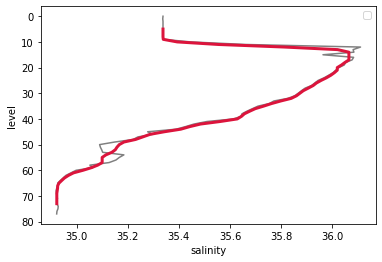

In [47]:
# TODO - convert to new era data set
argo["salinity"].sel(date='2012-10-31').plot.line(y="level", yincrease=False, color="grey");
argo["salinity"].sel(date='2012-10-31').rolling(level=10, center=True).median().plot.line(y="level", yincrease=False, linewidth=3, color="crimson");
plt.legend(), plt.title("");

<div class="alert alert-info" style="font-size:120%">

**REMEMBER**: <br>

The [xarray `groupby`](http://xarray.pydata.org/en/stable/groupby.html) with the same syntax as Pandas implements the __split-apply-combine__ strategy. Also [`resample`](http://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations) and [`rolling`](http://xarray.pydata.org/en/stable/computation.html?highlight=rolling#rolling-window-operations) are available in xarray.
    
__Note:__ Xarray adds a [`groupby_bins`](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.groupby_bins.html#xarray.Dataset.groupby_bins) convenience function for binned groups (instead of each value).

</div>

### Let's practice

<div class="alert alert-success">

**EXERCISE**:
    
Create the yearly total snowfall from 1991 up to 2005 and convert the snowfall into cm.  Make a plot (`imshow`) with each of the individual years in a separate subplot divided into 3 rows and 5 columns.
    
Make sure to update the name of the snowfall variable and/or colorbar label to make sure it defines the unit in cm.
 

<details><summary>Hints</summary>

* When selecting time series data from a coordinate with datetime-aware data, one can use strings to define a date. In combination with `slice`, the selection of the required years becomes `slice("1991", "2005")`.
* From montly to yearly data is a `resample` of the data.
* Use `.rename(NEW_NAME)` to update the name of a `DataArray`
* xarray supports _facetting_ directly, check out the `col` and `col_wrap` parameters in the plot functions of xarray or check http://xarray.pydata.org/en/stable/user-guide/plotting.html#faceting.
* To update the colorbar unit use, the `cbar_kwargs` option.

</details>    
    
</div>

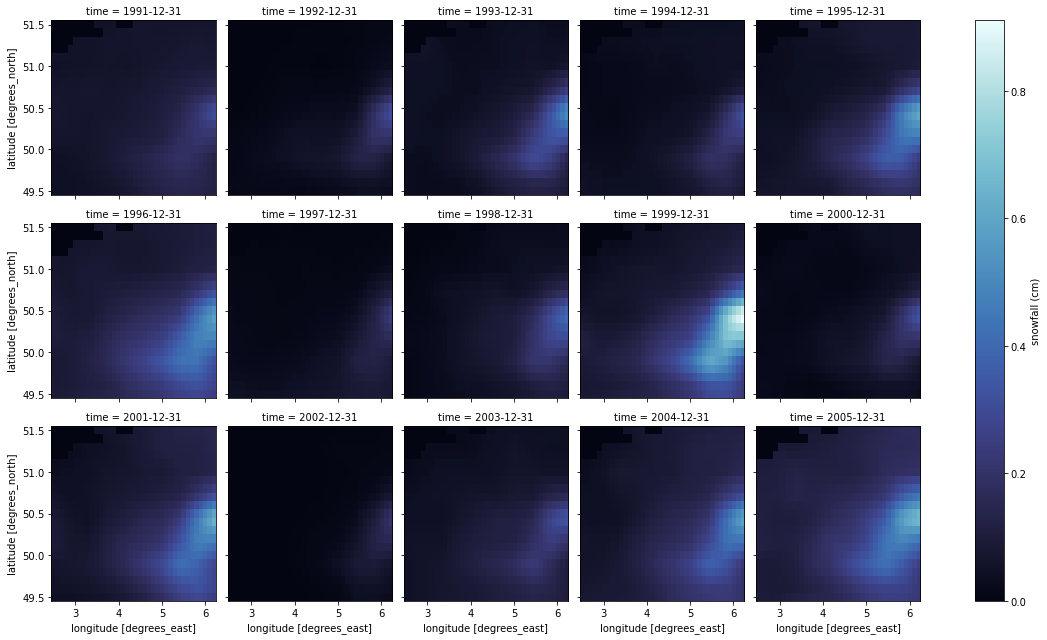

In [94]:
snowfall_1991_2005 = era5_renamed.sel(time=slice("1991", "2005"))["snowfall_m"]
snowfall_yearly = snowfall_1991_2005.resample(time="Y").sum()*100
snowfall_yearly = snowfall_yearly.rename("snowfall_cm")
snowfall_yearly.plot.imshow(col="time", col_wrap=5, cmap=cmocean.cm.ice, 
                            cbar_kwargs={"label": "snowfall (cm)"})

---------------

__Note:__ Values are only read from disk when needed. For example, the following statement only reads the coordinate information and the metadata. The data itself is not yet loaded:

In [49]:
data_file = "./data/gent/raster/2020-09-17_Sentinel_2_L1C_True_color.tiff"

In [50]:
gent = xr.open_rasterio(data_file)
gent

<xarray.DataArray (band: 3, y: 317, x: 625)>
[594375 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 6.639e+06 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
  * x        (x) float64 3.925e+05 3.926e+05 3.926e+05 ... 4.282e+05 4.283e+05
Attributes:
    transform:               (57.32777121388223, 0.0, 392465.9217302375, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (57.32777121388223, 57.44833434997156)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

`load()` will explicitly load the data into memory:

In [51]:
xr.open_rasterio(data_file).load()

<xarray.DataArray (band: 3, y: 317, x: 625)>
array([[[12812, 14483, 28688, ..., 16941, 17039, 14156],
        [16744, 12435, 14008, ..., 11993, 10764, 10731],
        [16564, 13107, 12615, ..., 11272, 12009, 11551],
        ...,
        [11911, 12157, 11157, ..., 23085, 16515, 11190],
        [11518, 11387, 11010, ..., 12026, 14582,  9814],
        [11567, 12255, 11862, ...,  9453, 11075, 13599]],

       [[15663, 16777, 27115, ..., 17826, 18186, 16482],
        [16040, 15188, 16433, ..., 15663, 14221, 13779],
        [16400, 15548, 15221, ..., 14631, 15778, 15974],
        ...,
        [15319, 15450, 15188, ..., 21610, 18841, 15810],
        [15401, 15532, 15401, ..., 14516, 16859, 15859],
        [15696, 15483, 15352, ..., 13844, 15810, 17334]],

       [[17776, 18645, 28475, ..., 19153, 19497, 18235],
        [18563, 17842, 18596, ..., 17613, 17023, 17154],
        [18628, 17563, 18088, ..., 17400, 18137, 17776],
        ...,
        [17645, 17744, 17432, ..., 22380, 20152, 17727],
        [17580, 17383, 17252, ..., 17776, 18284, 17350],
        [17891, 17678, 17662, ..., 16335, 17301, 18415]]], dtype=uint16)
Coordinates:
  * band     (band) int64 1 2 3
  * y        (y) float64 6.639e+06 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
  * x        (x) float64 3.925e+05 3.926e+05 3.926e+05 ... 4.282e+05 4.283e+05
Attributes:
    transform:               (57.32777121388223, 0.0, 392465.9217302375, 0.0,...
    crs:                     +init=epsg:3857
    res:                     (57.32777121388223, 57.44833434997156)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

## From DataSet to DataArray and back

Conversion from and to __TODO__

In [ ]:
xr_array = xr_array.assign_coords(band=("band", ["b4", "b8"]))
xr_data = xr_array.to_dataset(dim="band")
xr_data

Why do we want to use a Dataset instead of DataArray?

* We can actually have multiple arrays that are logically different variables, eg temperature and pressure with the same (lon, lat, time) dimensions
* For some cases it can be more convenient to work with

Recap the NDVI exercise of the previous notebook, using a stacked version of the 4th and 8th Sentinel band:

In [6]:
xr_array = xr.open_rasterio("./data/gent/raster/2020-09-17_Sentinel_2_L1C_B0408.tiff")
xr_array

<xarray.DataArray (band: 2, y: 317, x: 625)>
[396250 values with dtype=float64]
Coordinates:
  * band     (band) int64 1 2
  * y        (y) float64 6.639e+06 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
  * x        (x) float64 3.925e+05 3.926e+05 3.926e+05 ... 4.282e+05 4.283e+05
Attributes:
    transform:      (57.32777121388223, 0.0, 392465.9217302375, 0.0, -57.4483...
    crs:            +init=epsg:3857
    res:            (57.32777121388223, 57.44833434997156)
    is_tiled:       0
    nodatavals:     (nan, nan)
    scales:         (1.0, 1.0)
    offsets:        (0.0, 0.0)
    AREA_OR_POINT:  Area

In Numpy, we would do:

In [7]:
b48_bands = xr_array.values  # 0 is band 4 and 1 is band 8
b48_bands.shape

(2, 317, 625)

In [8]:
ndvi_np = (b48_bands[1] - b48_bands[0])/(b48_bands[0] + b48_bands[1]) # or was it b48_bands[0] -  b48_bands[1] ?

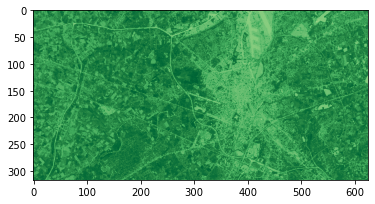

In [9]:
plt.imshow(ndvi_np, cmap="YlGn")

In __xarray__:

In [10]:
xr_array = xr_array.assign_coords(band=("band", ["b4", "b8"]))
xr_data = xr_array.to_dataset(dim="band")

In [11]:
ndvi_xr = (xr_data["b8"] - xr_data["b4"])/(xr_data["b8"] + xr_data["b4"])

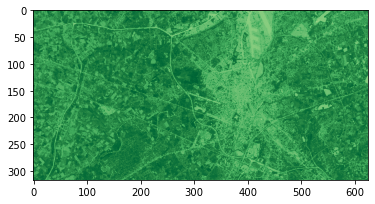

In [12]:
plt.imshow(ndvi_xr, cmap="YlGn")

The result is the same, but no more struggling on what index is representing which variable!

In [13]:
np.allclose(ndvi_xr.data, ndvi_np)

True

We can keep the result together with the other data variables by adding a new variable to the data, in a very similar way as we created a new column in Pandas:

In [14]:
xr_data["ndvi"] = ndvi_xr
xr_data

<xarray.Dataset>
Dimensions:  (x: 625, y: 317)
Coordinates:
  * y        (y) float64 6.639e+06 6.639e+06 6.639e+06 ... 6.621e+06 6.621e+06
  * x        (x) float64 3.925e+05 3.926e+05 3.926e+05 ... 4.282e+05 4.283e+05
Data variables:
    b4       (y, x) float64 0.0782 0.0884 0.1751 ... 0.05769 0.0676 0.08299
    b8       (y, x) float64 0.2736 0.257 0.2479 0.2257 ... 0.3324 0.3388 0.3722
    ndvi     (y, x) float64 0.5554 0.4881 0.1721 0.153 ... 0.7042 0.6673 0.6353
Attributes:
    transform:      (57.32777121388223, 0.0, 392465.9217302375, 0.0, -57.4483...
    crs:            +init=epsg:3857
    res:            (57.32777121388223, 57.44833434997156)
    is_tiled:       0
    nodatavals:     (nan, nan)
    scales:         (1.0, 1.0)
    offsets:        (0.0, 0.0)
    AREA_OR_POINT:  Area